# Sampling pi

Notebook written by [Manon Michel](manon.michel@uca.fr)

The beginning of stochastic computation takes place in the XVIIIth century with Buffon’s needle problem, the earliest problem of geometric probability. In 1733, the French naturalist asked the question of determining the probability that a needle of a certain length will lend on a line of the parquet flooring, made of equally spaced and parallel planks (1, p. 43- 45) and solved it in 1777 (2, p. 100 - 104). Even if it was not Buffon’s prime interest, the needle problem can be considered as the first Monte Carlo computation of the number $\pi$, by dropping needles on the parquet flooring and counting how many intersect a line of the floor.

![](buffon_start.png)

The goal here is to recreate the Buffon needle's game and to come up with a better sampling of $\pi$.

Refs:

(1) Buffon. [Histoire de l’Académie Royale des Sciences](http://gallica.bnf.fr/ark:/12148/bpt6k3530m/f51.image.r=). Imprimerie royale (Paris), 1733.

(2) G.-L. Leclerc comte de Buffon. [Histoire Naturelle, Générale et Particulière : supplément](http://www.buffon.cnrs.fr/ice/ice_page_detail.php?lang=fr&type=text&bdd=buffon&table=buffon_hn&bookId=33&typeofbookDes=hns&pageChapter=&pageOrder=104&facsimile=off&search=no). Tome Quatrième. Imprimerie royale (Paris), 1777.


Find below the animation of the simulation to recreate.

<video width="980 " height=" " 
       src="Buffon.mp4"  
       controls>
</video>

Library importation

In [10]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
from matplotlib.ticker import FixedLocator

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

Below, please:
1. Write the routine `add_needle` for the random needle throw.

View code

2. What is the impact of the value of the r parameter?


Intuitively, $r$ seems to approach the probability of a needle throw hitting two planks. It is obvious that if $r > 1$ is big enough, a needle will systematically hit two planks, whereas if $r \cong 0 $ is small enough, a needle will not hit any planks. 

3. Analytically derive the probability of a needle throw hitting two planks (r < 1 case)


Suppose  $r = \frac{l}{d} < 1$ 

Let $(\Delta)$ be the closest border between two planks to $(a)$ thrown needle $a$ with coordinates $(X, Y, \Phi)$, where, $X$, $Y$, and $\Phi$ are well-defined, uniformly distributed, and independent random variables. $\Phi$ is the angle between the needle and the planks, $(X, Y)$ are the coordintes of the center of $a$.

Since $X$ is an uniform random variable and independant of $Y$ and $\Phi$, it is obvious that the distance from the center of $(a)$ to any board edge follows a uniform distribution. So $ Z \in [0, \frac{d}{2}]$, the distance of the center of $(a)$ to $(\Delta)$ is a uniform variable.

$(a)$ hits two planks if and only if :
$$
    Z \leq \frac{l}{2} sin(\Phi) \quad \Phi \in [0, \frac{\pi}{2}]
$$

 So let A be the event a thrown needle hits two planks :
\begin{align}
   \mathbb{P}(A) & = \mathbb{P}(Z \leq \frac{l}{2} sin(\Phi)) \\
   & = \int _{\theta =0}^{\frac {\pi }{2}}\int _{x=0}^{{\frac {l}{2}}\sin \theta }{\frac {4}{d\pi }}\,dx\,d\theta ={\frac {2l}{d\pi}}
\end{align}

$d$ is the width of a plank and $l$ is the length a needle.

4. What is the average value of the observable $\theta$ which is equal to $1$ when a needle hits two planks and $0$ otherwise?


The average value of observable $\Theta$ is an approximation of the the probability of a needle throw hitting two planks.
$$
    \Theta  \sim \mathcal{B}(\frac{2l}{d\pi}) 
$$

$$
   \mathbb{E}(\Theta) = \frac{2l}{d\pi}
$$

5. Write the routine `get_running_pi` to estimate $\pi$ from the first `n_throws` samples (`n_throws` being a number)

View code

6. Write the routine `generate_throws` to generate $N$ samples and print the estimated value of $\pi$

View code

In [11]:
class buffon_exp:
    def __init__(self):
        # Parameter initialization
        self.l = 0.33 # needle length
        self.d = 1.0 # plank width
        self.r = self.l / self.d 
        self.N = 1000 # Number of needle throws
        self.start = self.N + 1 # number of first plank-hitting needle (
                                #(initialized to a value bigger than self.N)
        self.nx = 10 # Number of planks
        self.ny = 5 # self.d * self.ny = height of a plank
        self.Lx = [i * self.d for i in range(self.nx)]
        self.data = [] # Store whether a throw is hitting two planks or not
        self.C = [] # Store thrown needle positions. A needle configuration
                    # is completely determined by thre triplet (x, y, phi)
                    # x, y = needle center position and phi = needle angle

    def add_needle(self):
        # Write a routine randomly throwing a needle and 
        # checking whether the throw hit two planks
        rng = np.random.default_rng()
        x_needle = rng.uniform(0.0, self.Lx[-1], 1)[0]
        y_needle = rng.uniform(0.0, self.d * self.ny, 1)[0]
        phi_needle = rng.uniform(0.0, np.pi, 1)[0]
        self.C.append((x_needle, y_needle, phi_needle))
        
        # hit condition 
        x_closest = abs(np.round(x_needle / self.d) - x_needle)
        if(x_closest <= (self.l / 2) * np.sin(phi_needle)):
            self.data.append(1)
            if(self.start == self.N + 1):
                self.start = len(self.data)
        else:
            self.data.append(0)
        
        
    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
        if(len(self.data) < n_throws):
            print("There is not `n_throws` samples in the dataset")
            return None
        if(self.start > n_throws):
            return 0.0 # si l'évènement ne se ralise pas, par défault hat_pi = 0.0
        prob = sum(self.data[:n_throws + 1]) / (n_throws + 1)  # +1 car dans la simulation n_throws peut être egale à 0
        hat_pi = 2 * self.r / prob
        return hat_pi
        
                
    def generate_throws(self):
        # Write a routine to generate self.N needle throw and compute the estimated pi
        print('Generating needle throws')
        self.start = self.N + 1
        for i in range(self.N):
            self.add_needle()
        hat_pi = self.estimate_pi(self.N)
        print("hat_pi = ", hat_pi, " for ", self.N, " throws")
        return hat_pi
        
        
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        ax.plot(np.array([float(len(self.data[:i])) for i in range(self.N)]), 
                np.array([self.estimate_pi(i) - np.pi for i in range(self.N)]),
                    lw=1.5, c = color, alpha = alpha)
            
    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        for i in range(self.nx+1):
            self.axes[0].axvline(x = i * self.d, c = 'k')
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-self.d/2.0,self.nx * self.d + self.d/2.0)
        self.axes[0].set_ylim(-self.d/2.0, self.ny * self.d + self.d/2.0)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,4)
    
    def plot_total(self):
        self.set_fig()
        for throw in range(self.N): 
            x, y, phi = self.C[throw]
            if self.data[throw] == 1:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., c = 'r')
            else:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., alpha = 0.1, c = 'k')
            self.axes[0].add_line(line)
        if self.start < self.N:
            self.axes[1].plot(np.array([float(len(self.data[:(i)])) for i in range(self.N)]), 
                              np.array([self.estimate_pi(i) for i in range(self.N)]),
                              lw=1.5, c = 'k')    
        plt.show()


Generating needle throws
hat_pi =  3.477157894736842  for  1000  throws


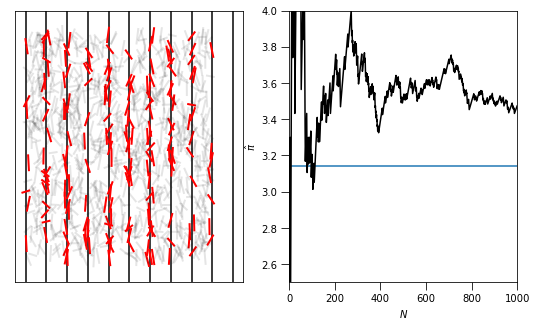

In [12]:
run_buffon = buffon_exp()
run_buffon.generate_throws()
run_buffon.plot_total()

7. How is the error between the estimator $\hat{\pi}$ and $\pi$ behaving with the number of samples $N$? Generate the error plot of 10 experiments. To do so, complete the `plot_error` routine above.



With more samples, the estimator tends to get closer and closer to the actual value. Let's demonstrate this more analytically. Let $\hat{\Theta} = \frac{1}{N}\sum_{i=1}^N \Theta_i$ :
$$
    \hat{\pi} = \frac{2l}{d\hat{\Theta}} \quad \text{But} \quad \hat{\Theta} \overset{p.s.}{\underset{n\rightarrow+\infty}\longrightarrow} \frac{2l}{d\pi} \quad \text{(TCL)}
$$

$$
\hat{\pi} \overset{p.s.}{\underset{n\rightarrow+\infty}\longrightarrow} \pi
$$

So, with a large sample size $N$, the error between $\hat{\pi}$ and $\pi$ becomes smaller.

Generating needle throws
hat_pi =  3.0445161290322584  for  1000  throws
Generating needle throws
hat_pi =  3.286865671641791  for  1000  throws
Generating needle throws
hat_pi =  2.799406779661017  for  1000  throws
Generating needle throws
hat_pi =  3.286865671641791  for  1000  throws
Generating needle throws
hat_pi =  3.146  for  1000  throws
Generating needle throws
hat_pi =  2.975945945945946  for  1000  throws
Generating needle throws
hat_pi =  2.8849781659388647  for  1000  throws
Generating needle throws
hat_pi =  3.388  for  1000  throws
Generating needle throws
hat_pi =  3.5329411764705885  for  1000  throws
Generating needle throws
hat_pi =  2.936266666666667  for  1000  throws


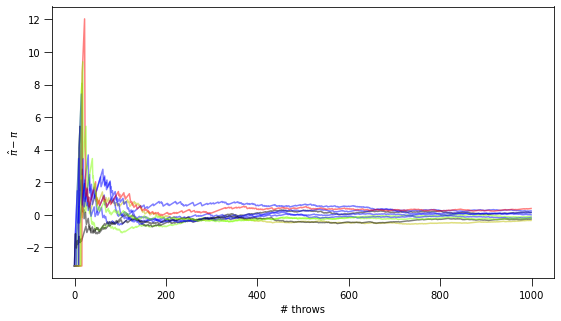

In [13]:
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig, alpha = 0.5)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')
plt.show()

8. What is the variance of the estimator $\hat{\theta} = \frac{1}{N}\sum_{i=1}^N \theta_i$, $N$ being the number of throws?


It's obvious that $\hat{\Theta}$ follows a binomial distribution as the sum of $n$ independent Bernoulli variables with a parameter of $\frac{2l}{d\pi}$.
$$
    \hat{\Theta}  \sim \mathcal{B}(N,\frac{2l}{d\pi}) 
$$

$$
   \mathbb{V}(\hat{\Theta}) = \frac{2l}{d\pi} (1 - \frac{2l}{d\pi}) N
$$

9. Derive the variance of the estimator $\hat{\pi}$ you constructed



Given $g(x) = \frac{2l}{dx}$, where $x \in (0, \infty)$ and $g'(x) = -\frac{2l}{dx^2}$.

Next, applying the delta method to $g(\hat{\Theta})$:

$$ \sqrt{N}\left(g(\hat{\Theta}) - g\left(\mathbb{E}(\Theta_1)\right)\right) \xrightarrow{\mathcal{L}} N\left(0, \left[g'\left(\mathbb{E}(\Theta_1)\right)\right]^2 \cdot \mathbb{V}(\Theta_1)\right)$$

Plugging in the corrected values:

$$
   \mathbb{E}(\Theta_1) = \frac{2l}{d\pi}, \quad g'\left(\mathbb{E}(\Theta_1)\right) = -\frac{\pi^2d}{2l}, \quad \mathbb{V}(\Theta_1) = \frac{2l}{d\pi} \left(1 - \frac{2l}{d\pi}\right)
$$

$$
 \sqrt{N}\left(g(\hat{\Theta}) - g\left(\mathbb{E}(\Theta_1)\right)\right) \xrightarrow{\mathcal{L}} N\left(0, \frac{d\pi^3}{2l}(1-\frac{2l}{d\pi})\right)
$$

the asymptotic variance of $\hat{\pi} = g(\hat{\Theta})$ is :

$$
   \mathbb{V}(\hat{\pi})  \sim_{+\infty}  \frac{d\pi^3}{2Nl}(1-\frac{2l}{d\pi}) = \frac{1}{N}(\frac{d\pi^3}{2l}-\pi^2)
$$


In order to construct an estimator of $\pi$ with a smaller variance, we now consider an experiment which will make the estimator $\hat{\pi}$ proportional to the averaged number of hits. 

We now throw pointwise pebbles in a unit square.
Below, please:

10. Write the routine `add_peeble` for the random peeble throw. What criterion should make a thrown peeble a successful hit?

View code

11. Analytically derive the probability of a peeble throw to be successful

The probability of a successful peeble throw is the ratio of the area of the circle inscribed in the square to the total area of the square of the unit. Let $A$ be this event. So :
$$
    \mathbb{P}(A) = \frac{\pi(\frac{1}{2})^2}{1} = \frac{\pi}{4}
$$

12. What is the average value of the observable $\theta$ which is equal to $1$ when a throw is successful and $0$ otherwise?


$\Theta$ is a Bernoulli variables with a parameter of $\frac{\pi}{4}$.
$$
    \Theta  \sim \mathcal{B}(\frac{\pi}{4}) 
$$
$$
   \mathbb{E}(\Theta) = \frac{\pi}{4}
$$

13. Write the routine `get_running_pi` to estimate $\pi$ from the first `n_throws` samples (`n_throws` being a number)

View code


14. Write the routine `generate_throws` to generate $N$ samples and print the estimated value of $\pi$

View code

In [14]:
class peeble_exp:
    def __init__(self):
        self.data = [] # Store whether a hit is successful or not
        self.C = [] # Store throw positions
        self.N = 1000 # Number of throws
        
    def add_peeble(self):
        # Write a routine randomly throwing a peeble in a unit square and 
        # define a criterion for a successful hit
        rng = np.random.default_rng()
        x_n = rng.uniform(-1/2, 1/2, 1)[0]
        y_n = rng.uniform(-1/2, 1/2, 1)[0]
        self.C.append([x_n, y_n])
        if(x_n**2 + y_n**2 <= 1/4):
            self.data.append(1)
        else:
            self.data.append(0)
    
    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
        nb_circle = sum(self.data[:n_throws + 1])
        return 4 * nb_circle / (n_throws + 1) 
        
    def generate_throws(self):
        # Write a routine to generate self.N peeble throw and compute the estimated pi
        print('Generating needle throws')
        for i in range(self.N):
            self.add_peeble()
        hat_pi = self.estimate_pi(self.N)
        print("hat_pi = ", hat_pi, " for ", self.N, " throws")
        return hat_pi
    
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        start = self.data.index(1)
        ax.plot(np.array([float(len(self.data[:i])) for i in range(self.N)]), 
                    np.array([self.estimate_pi(i) - np.pi for i in range(self.N)]),
                        lw=1.5, c = color, alpha = alpha)

    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-0.7,0.7)
        self.axes[0].set_ylim(-0.7, 0.7)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,3.5)

    def plot_total(self):
        self.set_fig()
        color_list = []
        for throw in range(self.N):
            if self.data[throw] == 1:
                color_list += ['r']
            else:
                color_list += ['k']
        self.axes[0].scatter(np.array(self.C)[:,0], np.array(self.C)[:,1], marker='o', 
                                 color=color_list , alpha=0.8)
        self.axes[1].plot(np.array([ float(len(self.data[:(i)])) for i in range(self.N)]), 
                          np.array([self.estimate_pi(i) for i in range(self.N)]), lw=1.5, c = 'k') 
        plt.show()

Generating needle throws
hat_pi =  3.072927072927073  for  1000  throws


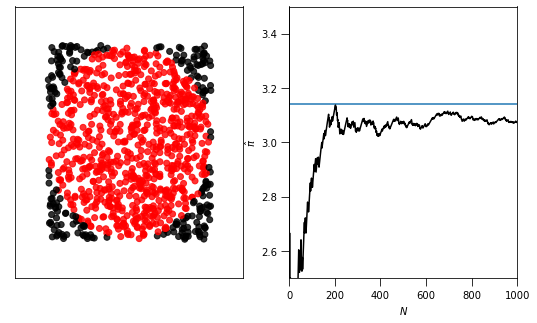

In [15]:
run_peeble = peeble_exp()
run_peeble.generate_throws()
run_peeble.plot_total()

15. How is the error between the estimator $\hat{\pi}$ and $\pi$ behaving with the number of samples $N$? Generate the error plot of 10 experiments and compare with the Buffon experiment. To do so, complete the `plot_error` routine above in `peeble_exp` and run the code below.


Like the last situation, as $N$ increases, the error tends to decrease. With again $\hat{\Theta} = \frac{1}{N}\sum_{i=1}^N \Theta_i$ :
$$
    \hat{\pi} = 4 \times \hat{\Theta} \quad \text{But} \quad \hat{\Theta} \overset{p.s.}{\underset{n\rightarrow+\infty}\longrightarrow} \frac{\pi}{4} \quad \text{(TCL)}
$$
$$
\hat{\pi} \overset{p.s.}{\underset{n\rightarrow+\infty}\longrightarrow} \pi
$$

Generating needle throws
hat_pi =  3.056943056943057  for  1000  throws
Generating needle throws
hat_pi =  3.1528471528471527  for  1000  throws
Generating needle throws
hat_pi =  3.1408591408591406  for  1000  throws
Generating needle throws
hat_pi =  3.1928071928071926  for  1000  throws
Generating needle throws
hat_pi =  3.160839160839161  for  1000  throws
Generating needle throws
hat_pi =  3.220779220779221  for  1000  throws
Generating needle throws
hat_pi =  3.144855144855145  for  1000  throws
Generating needle throws
hat_pi =  3.148851148851149  for  1000  throws
Generating needle throws
hat_pi =  3.116883116883117  for  1000  throws
Generating needle throws
hat_pi =  3.1248751248751248  for  1000  throws


Generating needle throws
hat_pi =  3.5329411764705885  for  1000  throws
Generating needle throws
hat_pi =  3.25448275862069  for  1000  throws
Generating needle throws
hat_pi =  3.1163207547169813  for  1000  throws
Generating needle throws
hat_pi =  3.072837209302326  for

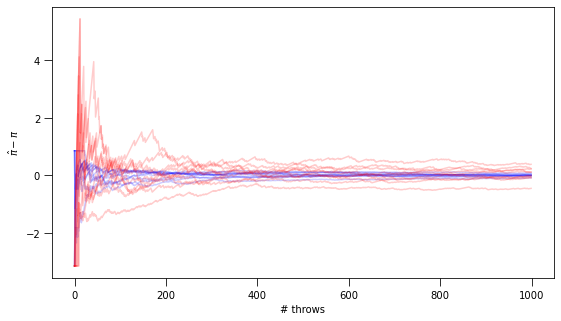

In [16]:
run_peeble = peeble_exp()
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_peeble.generate_throws()
    run_peeble.plot_error(fig=fig,color='b',alpha=0.2)
    run_peeble.C=[]
    run_peeble.data=[]
print ('\n')
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig,color='r',alpha=0.2)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')    
plt.show()

16. Derive the variance of the estimator $\hat{\pi}$ for the peeble experiment. How does it compare to the one of the Buffon experiment? Is it consistent with the numerical experiments?


 The variance of the estimator $\hat{\pi}$ for the peeble experiment is given by :
$$
    \mathbb{V}(\hat{\pi}) = 16 \times \mathbb{V}(\hat{\Theta}) = \frac{16}{N}(1-\frac{\pi}{4})\frac{\pi}{4} 
$$

Now :
$$ (\frac{d\pi^3}{2l}-\pi^2) > (\frac{\pi^3}{2}-\pi^2) > 16(1-\frac{\pi}{4})\frac{\pi}{4}  \quad \text{because}  \quad \frac{d}{l} > 1$$

So the best method is the last one with the circle in the unit square. It is also consistent with the numerical experiments.

17. Could you propose a better experiment and estimator to get $\pi$? (Propose it below and compare it with the previous experiments)

We can use the Monte Carlo integration method to get $\pi$.
$$
    \pi = \int_{0}^{1} 4 \sqrt{1-x^2} dx = \mathbb{E}(f(X)) \quad \text{where} \quad f(x) = 4\sqrt{1-x^2}
$$

$$
    \hat{\pi} = \frac{1}{N} \sum_{i=1}^{N} f(X_i) \quad \text{where} \quad X_i \sim \mathcal{U}(0,1)
$$

$$
    \mathbb{V}(\hat{\pi}) = \frac{1}{N}\mathbb{V}(f(X)) = \frac{1}{N}(\mathbb{E}(f(X)^2) - \mathbb{E}(f(X))^2)

$$

$$
    \mathbb{E}(f(X)) = \int_{0}^{1} 4 \sqrt{1-x^2} dx = \pi

$$

$$
    \mathbb{E}(f(X)^2) = \int_{0}^{1} 16 (1-x^2) dx = \frac{32}{3}

$$

$$
    \mathbb{V}(\hat{\pi}) = \frac{1}{N} \mathbb{V}(f(X)) = \frac{1}{N} (\mathbb{E}(f(X)^2) - \mathbb{E}(f(X))^2) = \frac{1}{N}(\frac{32}{3} - \pi^2)
$$

So the variance of the estimator $\hat{\pi}$ is smaller than the previous ones. We can also see that the variance decreases with the number of samples $N$.

Monte Carlo integration of f(x) = sqrt(1-x^2) on [0, 1] with N = 1000 :  3.1605552116061837


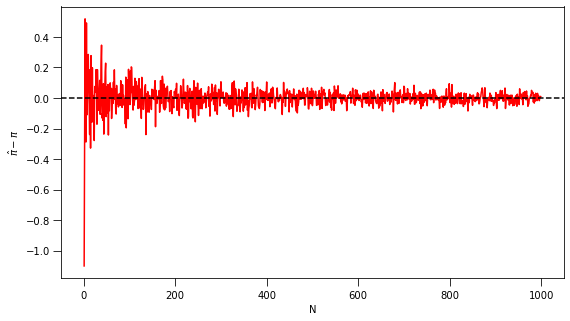

In [17]:
# calculte Monte Carlo integration f(x) = 4 sqrt(1-x^2) on [0, 1]
def f(x):
    return 4 * np.sqrt(1 - x**2)

def monte_carlo_integrate(f, N):
    rng = np.random.default_rng()
    x = rng.uniform(0, 1, N)
    return sum(f(x)) / N

print("Monte Carlo integration of f(x) = sqrt(1-x^2) on [0, 1] with N = 1000 : ", monte_carlo_integrate(f, 1000))


def plot_error(f, N):
    fig_err = plt.figure(figsize=(9,5))
    ax = fig_err.gca()
    ax.plot(np.array([float(i) for i in range(1, N)]), 
                np.array([monte_carlo_integrate(f, i) - np.pi for i in range(1, N)]),
                    lw=1.5, c = 'r', alpha = 1.0)
    # plot line y = 0
    ax.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('N')
    plt.ylabel(r'$\hat{\pi}-\pi$')
    plt.show()

plot_error(f, 1000)

demontre que la variance est plus petite que les autres:

$$
    \mathbb{V}(\hat{\pi}) = \frac{1}{N} \mathbb{V}(f(X)) = \frac{1}{N} (\mathbb{E}(f(X)^2) - \mathbb{E}(f(X))^2) = \frac{1}{N}(\frac{32}{3} - \pi^2)
$$